In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets 

In [2]:
plt.style.use('ggplot')

In [3]:

df = pd.read_csv(r"D:\Anirudh\CODSOFT INTERN\Movie Prediction\IMDb Movies India.csv", encoding='latin1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [6]:
df.fillna({"Rating":5.84})

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,5.84,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.00,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.84,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.40,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.84,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.60,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.50,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,5.84,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,5.84,NaN,NaN,NaN,NaN,NaN


In [7]:
# Step 1: Convert the column to string type
df['Duration'] = df['Duration'].astype(str)
# Step 2: Extract digits using egex
df['Duration'] = df['Duration'].str.extract(r'(\d+)')
# Step 3: Convert to numeic (float)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df.describe()

,Duration,Rating
count,7240.000000,7919.000000
mean,128.126519,5.841621
std,28.912724,1.381777
min,2.000000,1.100000
25%,110.000000,4.900000
50%,131.000000,6.000000
75%,147.000000,6.800000
max,321.000000,10.000000


In [10]:
df.fillna({"Duration": 128.12, "Rating": 5.84}, inplace=True)

In [11]:
df.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,128.12,Drama,5.84,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109.00,Drama,7.00,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90.00,"Drama, Musical",5.84,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110.00,"Comedy, Romance",4.40,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105.00,Drama,5.84,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147.00,"Comedy, Drama, Musical",4.70,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.00,"Drama, Romance, War",7.40,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59.00,Documentary,5.84,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82.00,"Horror, Mystery, Thriller",5.60,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116.00,"Action, Crime, Thriller",4.00,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [12]:
df = df.drop(0)

In [13]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.00,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90.0,"Drama, Musical",5.84,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.40,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105.0,Drama,5.84,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.70,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [14]:
df.isna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,False,False,False,True,False,False,True,True
15507,False,False,False,False,False,True,True,True,True,True


In [15]:
# Step 1: Convert the column to string type
df['Votes'] = df['Votes'].astype(str)
# Step 2: Extract digits using egex
df['Votes'] = df['Votes'].str.extract(r'(\d+)')
# Step 3: Convert to numeic (float)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [16]:
df.describe()

,Duration,Rating,Votes
count,15508.000000,15508.000000,7920.000000
mean,128.123044,5.840828,101.663258
std,19.754426,0.987375,181.816665
min,2.000000,1.100000,1.000000
25%,128.120000,5.840000,9.000000
50%,128.120000,5.840000,25.000000
75%,129.000000,6.000000,90.000000
max,321.000000,10.000000,999.000000


In [17]:

df.fillna({"Votes":101.6} ,inplace = True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.00,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90.0,"Drama, Musical",5.84,101.6,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.40,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105.0,Drama,5.84,101.6,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.70,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [18]:
df.isna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,False,False,False,False,False,False,True,True
15507,False,False,False,False,False,False,True,True,True,True


In [19]:
df= df.drop(15506)
df.isna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15503,False,False,False,False,False,False,False,False,False,False
15504,False,False,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15507,False,False,False,False,False,False,True,True,True,True


In [20]:
df= df.drop(15507)
df.isna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15502,False,False,False,False,False,False,False,False,False,False
15503,False,False,False,False,False,False,False,False,False,False
15504,False,False,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False


In [21]:
df.loc[df.duplicated()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1250,Arab Ka Sona - Abu Kaalia,(1979),128.12,Action,5.84,101.6,Master Bhagwan,Meena Rai,Dara Singh,NaN
1769,Balidan,(1992),128.12,Drama,5.84,101.6,NaN,NaN,NaN,NaN
4723,First Time - Pehli Baar,(2009),128.12,NaN,5.84,101.6,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
9713,Musafir,NaN,128.12,Thriller,5.84,101.6,Shiva Dagar,NaN,NaN,NaN
13069,Shivani,(2019),128.12,Crime,5.84,101.6,Ugresh Prasad Ujala,Santosh,NaN,NaN
13308,Slumdog Karodpati,(2019),118.00,Thriller,5.84,101.6,Rajesh Patole,Udhav Garje,Rahul Gavane,Govindrao


In [22]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3'], how='all', inplace=True)

In [23]:
df.loc[df.duplicated()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1250,Arab Ka Sona - Abu Kaalia,(1979),128.12,Action,5.84,101.6,Master Bhagwan,Meena Rai,Dara Singh,NaN
4723,First Time - Pehli Baar,(2009),128.12,NaN,5.84,101.6,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
9713,Musafir,NaN,128.12,Thriller,5.84,101.6,Shiva Dagar,NaN,NaN,NaN
13069,Shivani,(2019),128.12,Crime,5.84,101.6,Ugresh Prasad Ujala,Santosh,NaN,NaN
13308,Slumdog Karodpati,(2019),118.00,Thriller,5.84,101.6,Rajesh Patole,Udhav Garje,Rahul Gavane,Govindrao


In [24]:
df.drop('Actor 2',axis=1, inplace= True )
df.drop('Actor 3', axis=1 , inplace = True )

In [25]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.00,8.0,Gaurav Bakshi,Rasika Dugal
2,#Homecoming,(2021),90.0,"Drama, Musical",5.84,101.6,Soumyajit Majumdar,Sayani Gupta
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.40,35.0,Ovais Khan,Prateik
4,...And Once Again,(2010),105.0,Drama,5.84,101.6,Amol Palekar,Rajat Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.70,827.0,Rahul Rawail,Bobby Deol


In [26]:
df.isna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
15502,False,False,False,False,False,False,False,False
15503,False,False,False,False,False,False,False,False
15504,False,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False


In [27]:
df.isna().sum()

Name           0
Year         499
Duration       0
Genre       1853
Rating         0
Votes          0
Director       0
Actor 1     1092
dtype: int64

In [28]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.00,8.0,Gaurav Bakshi,Rasika Dugal
2,#Homecoming,(2021),90.0,"Drama, Musical",5.84,101.6,Soumyajit Majumdar,Sayani Gupta
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.40,35.0,Ovais Khan,Prateik
4,...And Once Again,(2010),105.0,Drama,5.84,101.6,Amol Palekar,Rajat Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.70,827.0,Rahul Rawail,Bobby Deol


In [29]:
# NOW ML MODEL TIME 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Copy the working DataFrame
df_encoded = df.copy()

# Step 2: Encode categorical variables
label_encoders = {}
for col in ['Genre', 'Director', 'Actor 1']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # Store for inverse transforms if needed

# Step 3: Prepare features and target
X = df_encoded[['Genre', 'Director', 'Actor 1', 'Duration']]
y = df_encoded['Rating']

# Optional: convert 'Year' if needed
# df_encoded['Year'] = df_encoded['Year'].astype(str).str.extract('(\d+)').astype(float)
# X['Year'] = df_encoded['Year']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)

print("📊 Model Evaluation Metrics:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


📊 Model Evaluation Metrics:
RMSE: 0.99
R² Score: 0.03


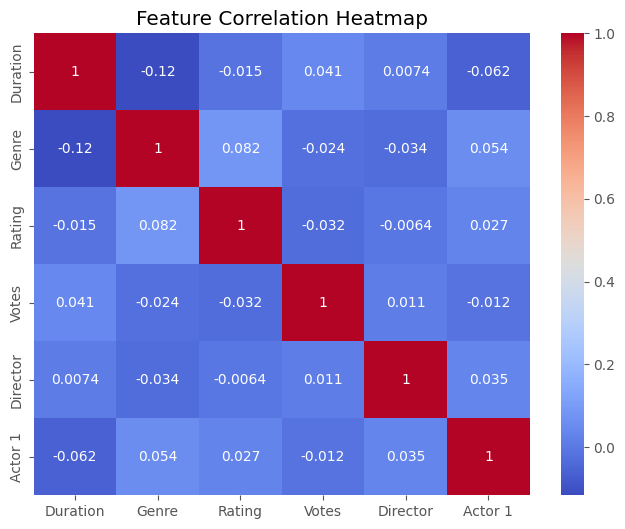

In [34]:
# Only include numeric columns for correlation
numeric_df = df_encoded.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


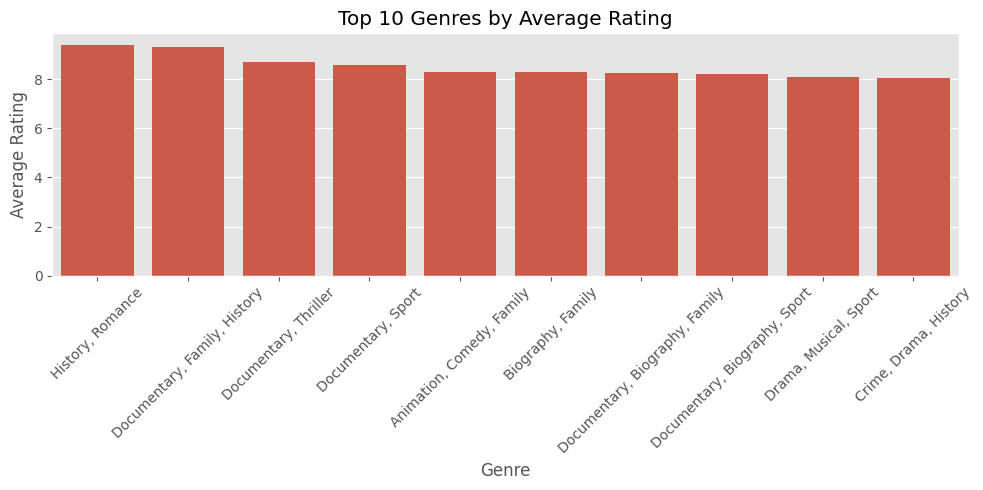

In [36]:
plt.figure(figsize=(10, 5))

# Calculate average rating by genre and get top 10
avg_genre_rating = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)

# Plot
sns.barplot(x=avg_genre_rating.index, y=avg_genre_rating.values)
plt.xticks(rotation=45)
plt.title("Top 10 Genres by Average Rating")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


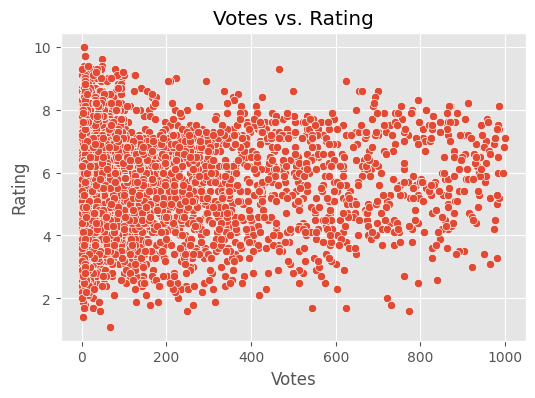

In [37]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Votes', y='Rating')
plt.title("Votes vs. Rating")
plt.show()
